Импортируем библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Easy

Считываем датасет

In [2]:
df = pd.read_csv('../data/marketing_campaign.csv', sep=';', index_col=0)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,3,11,0


Считаем суммарное число жалоб

In [3]:
complaints_cnt = df["Complain"].sum()
complaints_cnt

21

Считаем средний возраст; считаем средний возраст людей, совершивших хотя бы одну попытку; сравниваем с погрешностью. Значения оказываются равны с погрешностью.
Здесь же к датасету добавляем поле "age", оно будет использоваться и дальше.

In [4]:
age = (2024 - df["Year_Birth"]).mean()

df["age"] = 2024 - df["Year_Birth"]
customer_age = df.loc[(df["MntFishProducts"] > 0) | (df["MntMeatProducts"] > 0) | (df["MntFruits"] > 0) | (df["MntSweetProducts"] > 0) | (df["MntWines"] > 0) | (df["MntGoldProds"] > 0), "age"].mean()

age, customer_age, abs(age - customer_age) >= 0.00000000000001

(55.19419642857143, 55.19419642857143, False)

## Medium

Оба признака нечисловые, так что отобразим на круговых диаграмах. Считаем среднее число людей с каждым типом семейного положения для фиксированного уровня образования и считаем долю. Выводим по диаграмме на каждый уровень образования.

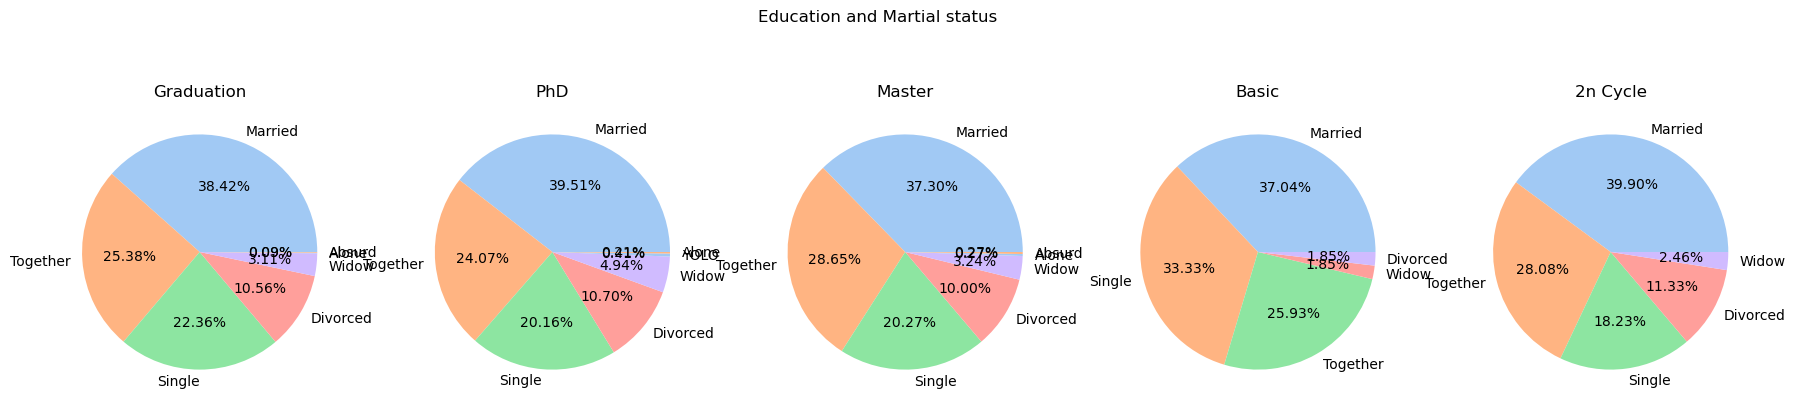

In [5]:
edu_mar = df["Education"].unique()
cnts = df.groupby("Education")["Marital_Status"].value_counts()

tmp, charts = plt.subplots(nrows=1, ncols=5, figsize=(22, 5))
colors = sns.color_palette('pastel')[ 0:5 ]
for i, lvl in enumerate(edu_mar):
    data = cnts[lvl]
    charts[i].pie(data, labels=data.index, colors=colors, autopct="%1.2f%%")
    charts[i].set_title(lvl)
plt.suptitle('Education and Martial status')

plt.show()

Дальше хотя бы один из признаков числовой, отображаем столбчатые или линейные графики.

Education and Income


<Axes: xlabel='Education', ylabel='Income'>

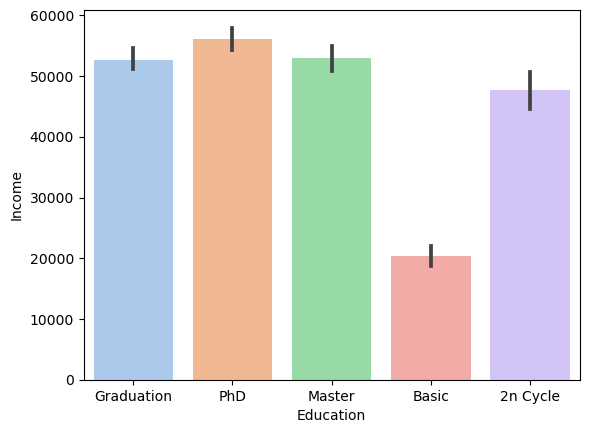

In [6]:
print("Education and Income")
sns.barplot(data=df, x="Education", y="Income", palette=sns.color_palette("pastel"))

Education and Kidhome


<Axes: xlabel='Education', ylabel='Kidhome'>

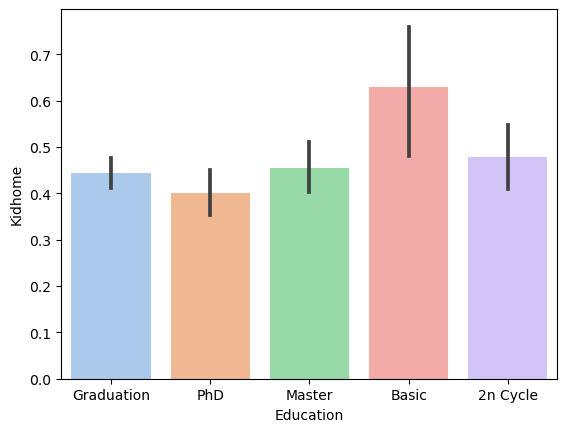

In [7]:
print("Education and Kidhome")
sns.barplot(data=df, x="Education", y="Kidhome", palette=sns.color_palette("pastel"))

Education and Teenhome


<Axes: xlabel='Education', ylabel='Teenhome'>

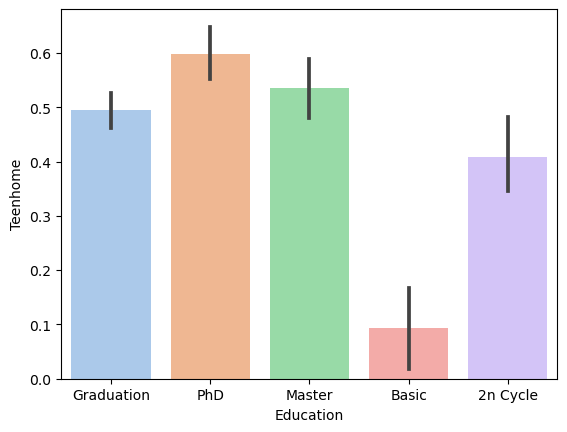

In [8]:
print("Education and Teenhome")
sns.barplot(data=df, x="Education", y="Teenhome", palette=sns.color_palette("pastel"))

Education and Recency


<Axes: xlabel='Education', ylabel='Recency'>

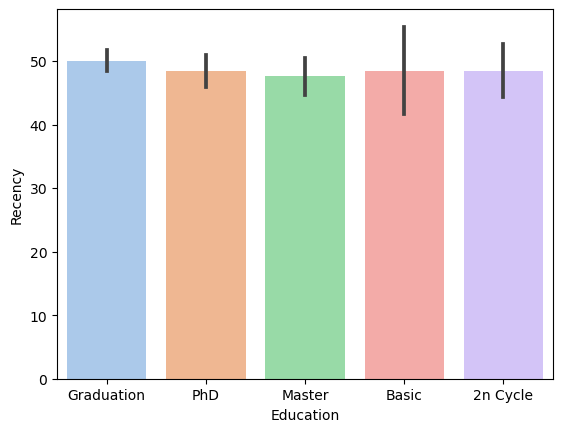

In [9]:
print("Education and Recency")
sns.barplot(data=df, x="Education", y="Recency", palette=sns.color_palette("pastel"))

Education and NumWebPurchases


<Axes: xlabel='Education', ylabel='NumWebPurchases'>

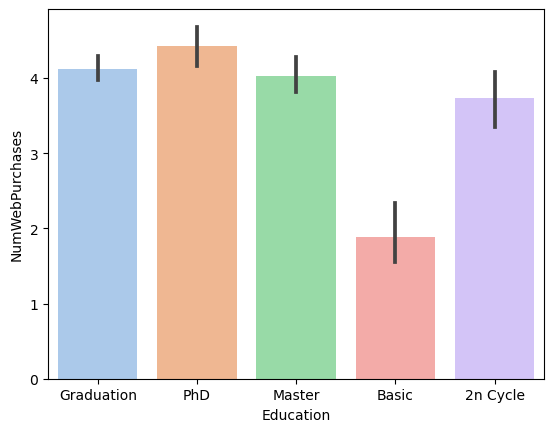

In [10]:
print("Education and NumWebPurchases")
sns.barplot(data=df, x="Education", y="NumWebPurchases", palette=sns.color_palette("pastel"))

Education and NumStorePurchases


<Axes: xlabel='Education', ylabel='NumStorePurchases'>

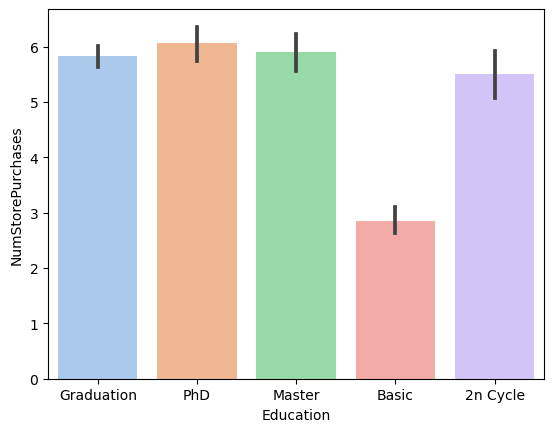

In [11]:
print("Education and NumStorePurchases")
sns.barplot(data=df, x="Education", y="NumStorePurchases", palette=sns.color_palette("pastel"))

Education and Age


<Axes: xlabel='Education', ylabel='age'>

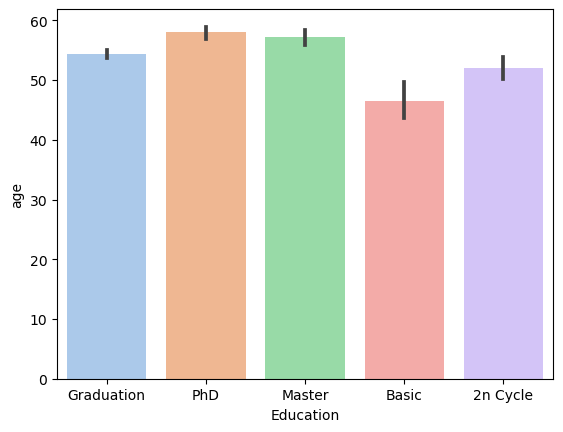

In [12]:
print("Education and Age")
sns.barplot(data=df, x="Education", y="age", palette=sns.color_palette("pastel"))

Marital Status and Income


<Axes: xlabel='Marital_Status', ylabel='Income'>

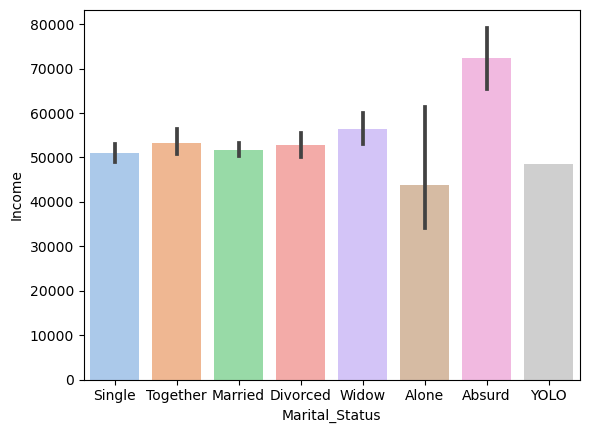

In [13]:
print("Marital Status and Income")
sns.barplot(data=df, x="Marital_Status", y="Income", palette=sns.color_palette("pastel"))

Marital Status and Kidhome


<Axes: xlabel='Marital_Status', ylabel='Kidhome'>

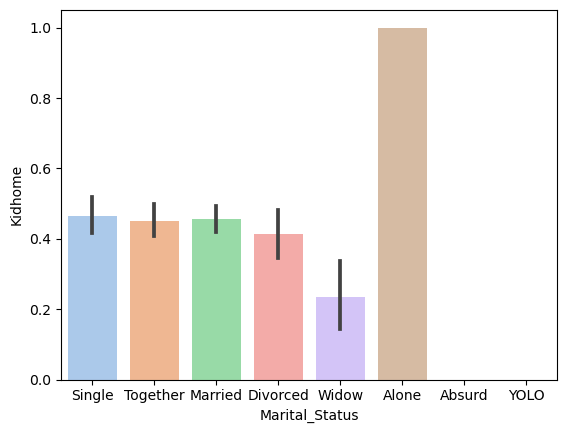

In [14]:
print("Marital Status and Kidhome")
sns.barplot(data=df, x="Marital_Status", y="Kidhome", palette=sns.color_palette("pastel"))

Marital Status and Teenhome


<Axes: xlabel='Marital_Status', ylabel='Teenhome'>

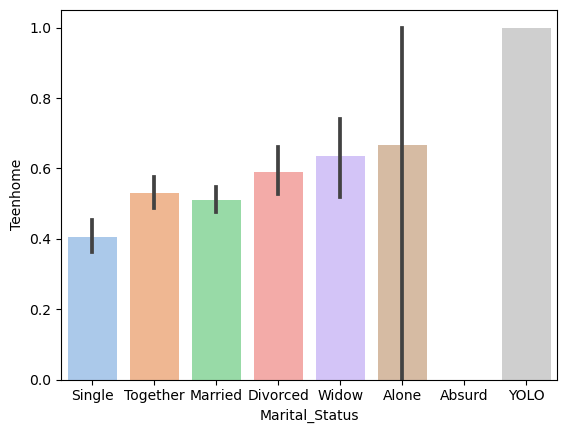

In [15]:
print("Marital Status and Teenhome")
sns.barplot(data=df, x="Marital_Status", y="Teenhome", palette=sns.color_palette("pastel"))

Marital Status and Recency


<Axes: xlabel='Marital_Status', ylabel='Recency'>

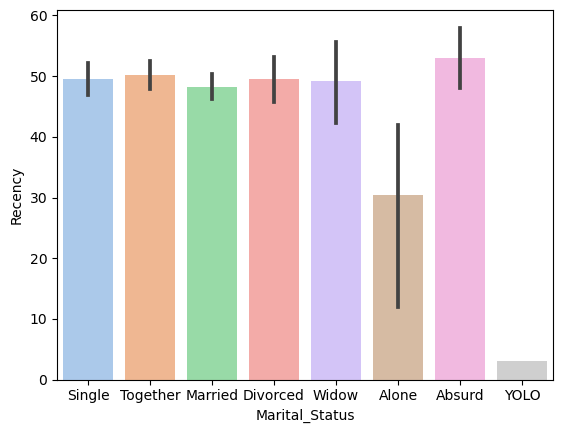

In [16]:
print("Marital Status and Recency")
sns.barplot(data=df, x="Marital_Status", y="Recency", palette=sns.color_palette("pastel"))

Marital Status and NumWebPurchases


<Axes: xlabel='Marital_Status', ylabel='NumWebPurchases'>

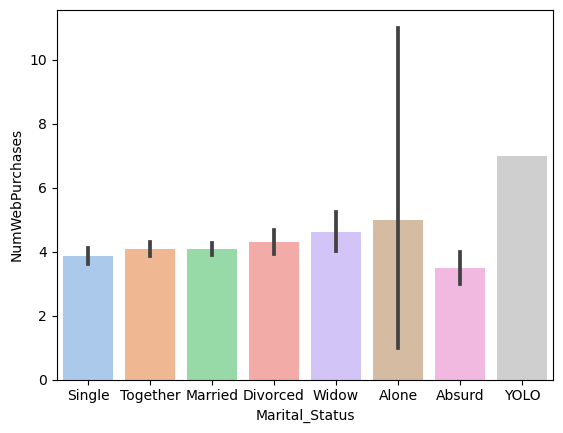

In [17]:
print("Marital Status and NumWebPurchases")
sns.barplot(data=df, x="Marital_Status", y="NumWebPurchases", palette=sns.color_palette("pastel"))

Marital Status and NumStorePurchases


<Axes: xlabel='Marital_Status', ylabel='NumStorePurchases'>

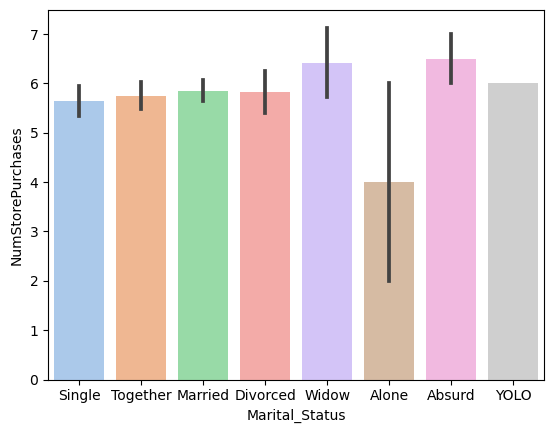

In [18]:
print("Marital Status and NumStorePurchases")
sns.barplot(data=df, x="Marital_Status", y="NumStorePurchases", palette=sns.color_palette("pastel"))

Marital Status and Age


<Axes: xlabel='Marital_Status', ylabel='age'>

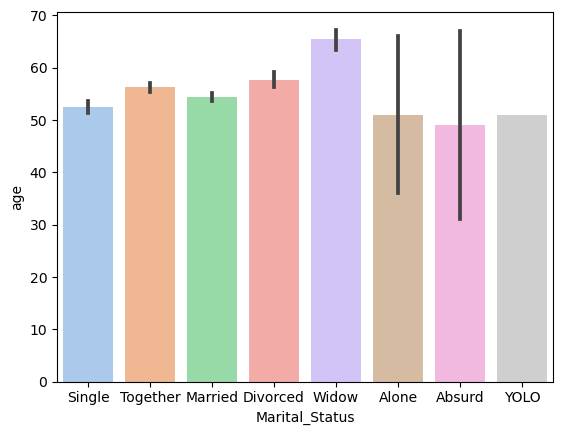

In [19]:
print("Marital Status and Age")
sns.barplot(data=df, x="Marital_Status", y="age", palette=sns.color_palette("pastel"))

Income and Kidhome


<Axes: xlabel='Kidhome', ylabel='Income'>

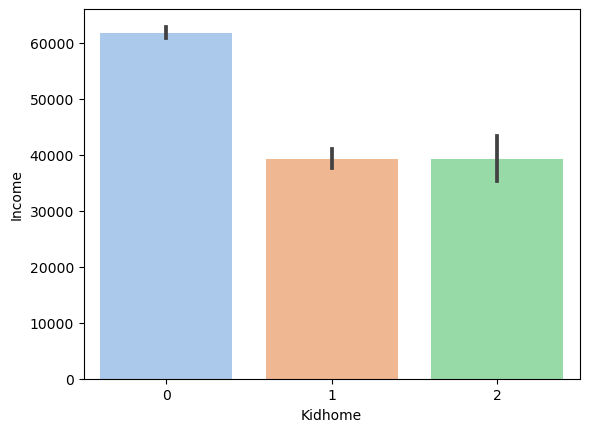

In [20]:
print("Income and Kidhome")
sns.barplot(data=df, x="Kidhome", y="Income", palette=sns.color_palette("pastel"))

Income and Teenhome


<Axes: xlabel='Teenhome', ylabel='Income'>

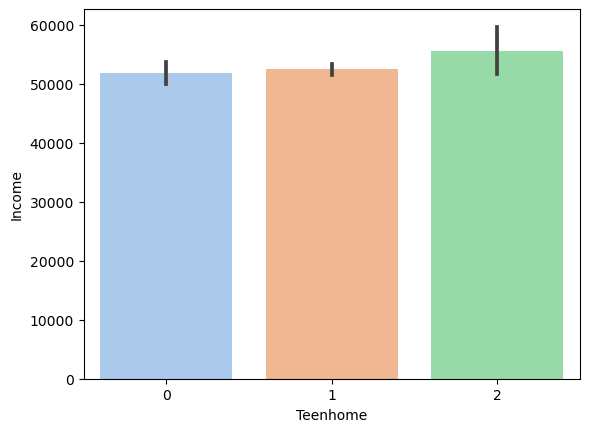

In [21]:
print("Income and Teenhome")
sns.barplot(data=df, x="Teenhome", y="Income", palette=sns.color_palette("pastel"))

Income and Recency


<Axes: xlabel='Recency', ylabel='Income'>

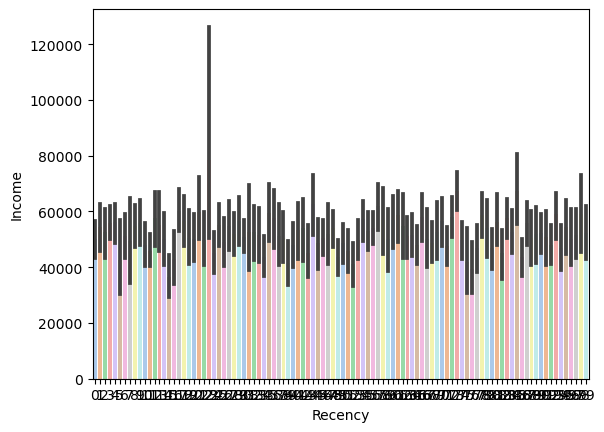

In [22]:
print("Income and Recency")
sns.barplot(data=df, x="Recency", y="Income", palette=sns.color_palette("pastel"))

Income and NumWebPurchases


C:\Users\423\AppData\Local\Temp\ipykernel_2212\1733531969.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x="NumWebPurchases", y="Income", palette=sns.color_palette("pastel"))
C:\Users\423\miniconda3\envs\myenvironment\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\423\miniconda3\envs\myenvironment\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='NumWebPurchases', ylabel='Income'>

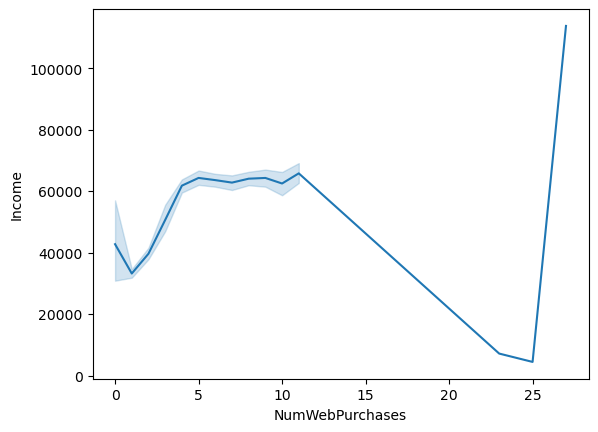

In [23]:
print("Income and NumWebPurchases")
sns.lineplot(data=df, x="NumWebPurchases", y="Income", palette=sns.color_palette("pastel"))

Income and NumWStorePurchases


C:\Users\423\AppData\Local\Temp\ipykernel_2212\3382936836.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x="NumStorePurchases", y="Income", palette=sns.color_palette("pastel"))
C:\Users\423\miniconda3\envs\myenvironment\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\423\miniconda3\envs\myenvironment\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='NumStorePurchases', ylabel='Income'>

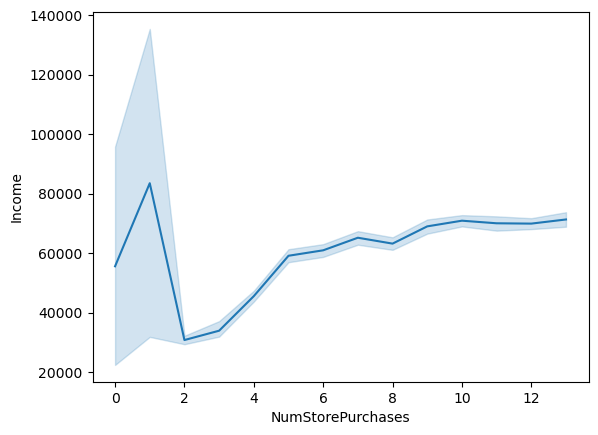

In [24]:
print("Income and NumWStorePurchases")
sns.lineplot(data=df, x="NumStorePurchases", y="Income", palette=sns.color_palette("pastel"))

Income and Age


C:\Users\423\AppData\Local\Temp\ipykernel_2212\726855513.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x="age", y="Income", palette=sns.color_palette("pastel"))
C:\Users\423\miniconda3\envs\myenvironment\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\423\miniconda3\envs\myenvironment\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Income'>

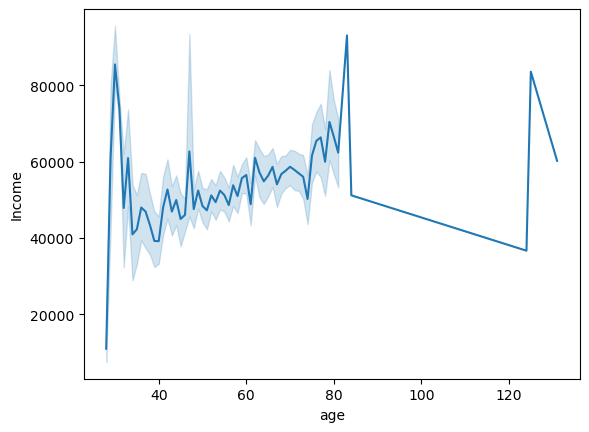

In [25]:
print("Income and Age")
sns.lineplot(data=df, x="age", y="Income", palette=sns.color_palette("pastel"))

Kidhome and Teenhome


<Axes: xlabel='Kidhome', ylabel='Teenhome'>

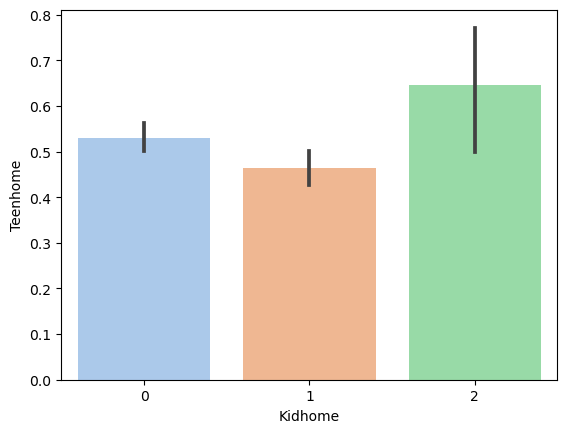

In [26]:
print("Kidhome and Teenhome")
sns.barplot(data=df, x="Kidhome", y="Teenhome", palette=sns.color_palette("pastel"))

Kidhome and Recency


<Axes: xlabel='Kidhome', ylabel='Recency'>

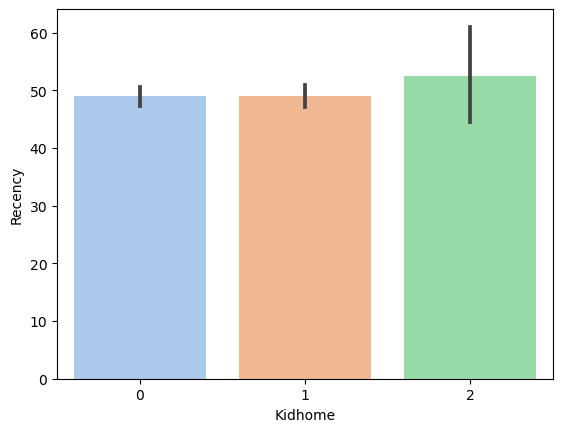

In [27]:
print("Kidhome and Recency")
sns.barplot(data=df, x="Kidhome", y="Recency", palette=sns.color_palette("pastel"))

Kidhome and NumWebPurchases


<Axes: xlabel='Kidhome', ylabel='NumWebPurchases'>

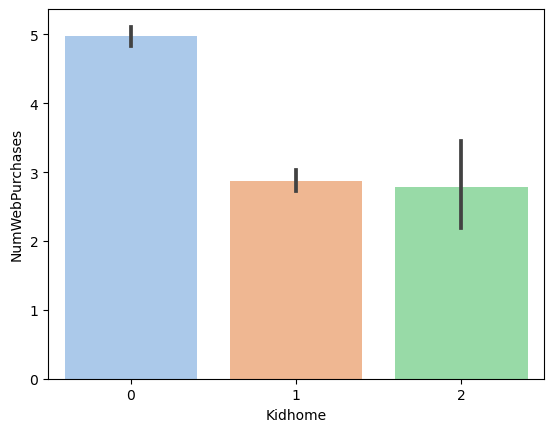

In [28]:
print("Kidhome and NumWebPurchases")
sns.barplot(data=df, x="Kidhome", y="NumWebPurchases", palette=sns.color_palette("pastel"))

Kidhome and NumStorePurchases


<Axes: xlabel='Kidhome', ylabel='NumStorePurchases'>

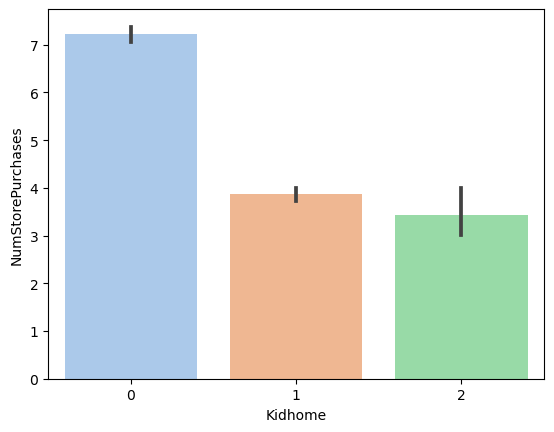

In [29]:
print("Kidhome and NumStorePurchases")
sns.barplot(data=df, x="Kidhome", y="NumStorePurchases", palette=sns.color_palette("pastel"))

Kidhome and Age


<Axes: xlabel='Kidhome', ylabel='age'>

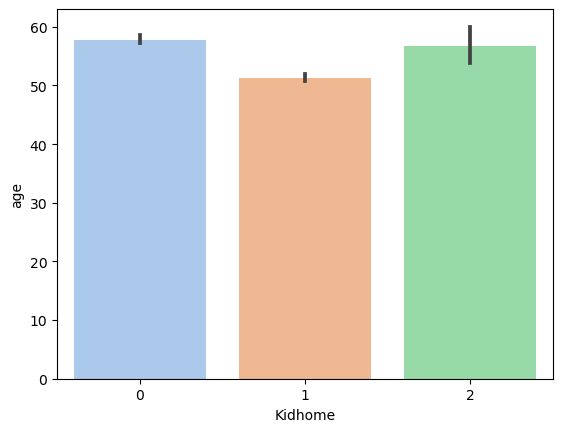

In [30]:
print("Kidhome and Age")
sns.barplot(data=df, x="Kidhome", y="age", palette=sns.color_palette("pastel"))

Teenhome and Recency


<Axes: xlabel='Teenhome', ylabel='Recency'>

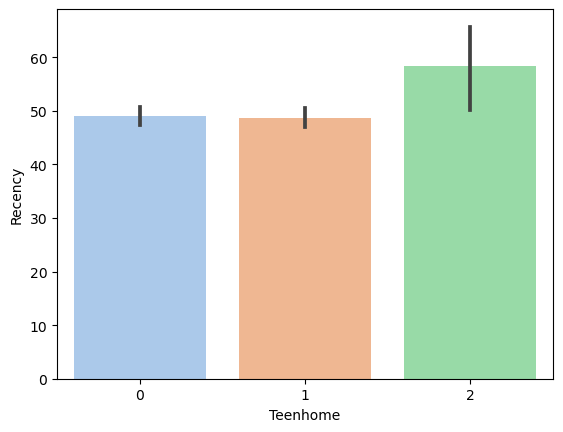

In [31]:
print("Teenhome and Recency")
sns.barplot(data=df, x="Teenhome", y="Recency", palette=sns.color_palette("pastel"))

Teenhome and NumWebPurchases


<Axes: xlabel='Teenhome', ylabel='NumWebPurchases'>

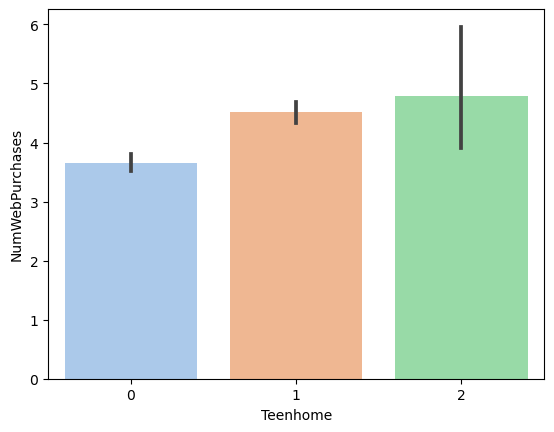

In [32]:
print("Teenhome and NumWebPurchases")
sns.barplot(data=df, x="Teenhome", y="NumWebPurchases", palette=sns.color_palette("pastel"))

Teenhome and NumStorePurchases


<Axes: xlabel='Teenhome', ylabel='NumStorePurchases'>

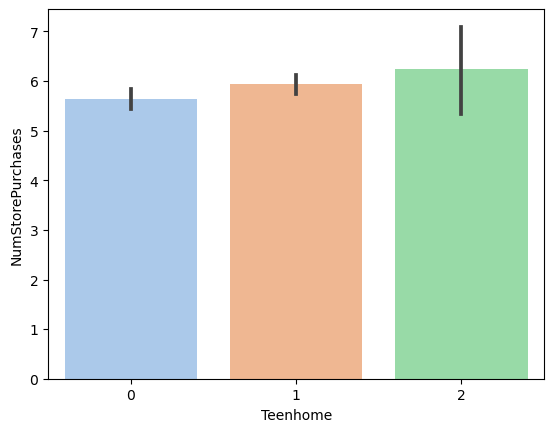

In [33]:
print("Teenhome and NumStorePurchases")
sns.barplot(data=df, x="Teenhome", y="NumStorePurchases", palette=sns.color_palette("pastel"))

Teenhome and Age


<Axes: xlabel='Teenhome', ylabel='age'>

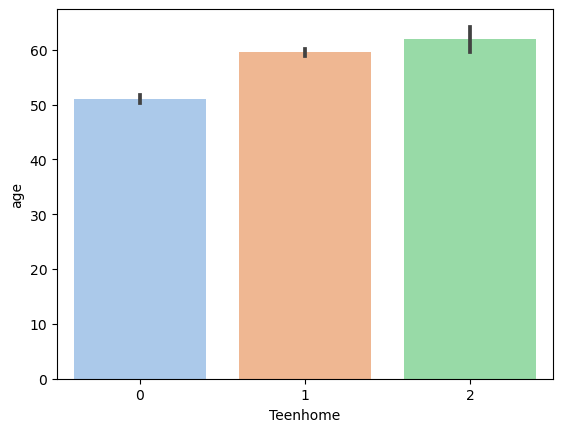

In [34]:
print("Teenhome and Age")
sns.barplot(data=df, x="Teenhome", y="age", palette=sns.color_palette("pastel"))

Recency and NumWebPurchases


C:\Users\423\AppData\Local\Temp\ipykernel_2212\1102145349.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x="Recency", y="NumWebPurchases", palette=sns.color_palette("pastel"))
C:\Users\423\miniconda3\envs\myenvironment\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\423\miniconda3\envs\myenvironment\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Recency', ylabel='NumWebPurchases'>

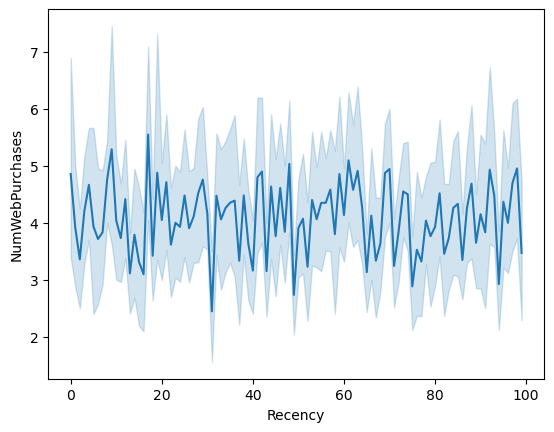

In [35]:
print("Recency and NumWebPurchases")
sns.lineplot(data=df, x="Recency", y="NumWebPurchases", palette=sns.color_palette("pastel"))

Recency and NumStorePurchases


C:\Users\423\AppData\Local\Temp\ipykernel_2212\2763291880.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x="Recency", y="NumStorePurchases", palette=sns.color_palette("pastel"))
C:\Users\423\miniconda3\envs\myenvironment\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\423\miniconda3\envs\myenvironment\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Recency', ylabel='NumStorePurchases'>

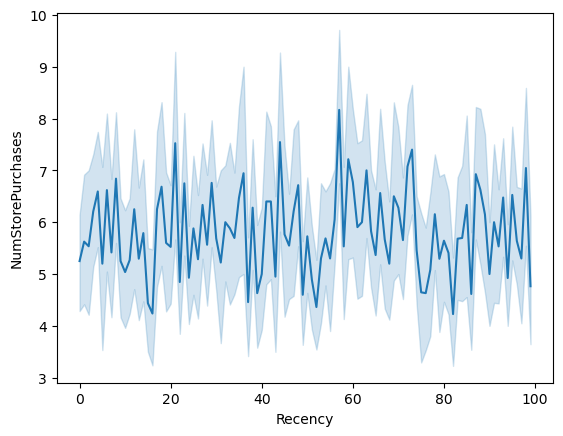

In [36]:
print("Recency and NumStorePurchases")
sns.lineplot(data=df, x="Recency", y="NumStorePurchases", palette=sns.color_palette("pastel"))

Recency and Age


C:\Users\423\AppData\Local\Temp\ipykernel_2212\2135021438.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x="Recency", y="age", palette=sns.color_palette("pastel"))
C:\Users\423\miniconda3\envs\myenvironment\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\423\miniconda3\envs\myenvironment\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Recency', ylabel='age'>

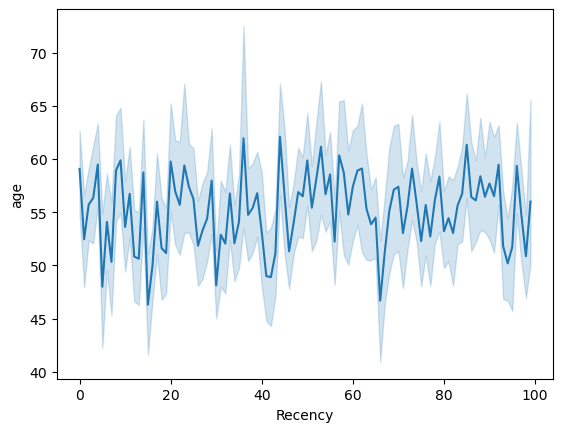

In [37]:
print("Recency and Age")
sns.lineplot(data=df, x="Recency", y="age", palette=sns.color_palette("pastel"))

NumWebPurchases and NumStorePurchases


C:\Users\423\AppData\Local\Temp\ipykernel_2212\24479131.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x="NumWebPurchases", y="NumStorePurchases", palette=sns.color_palette("pastel"))
C:\Users\423\miniconda3\envs\myenvironment\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\423\miniconda3\envs\myenvironment\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='NumWebPurchases', ylabel='NumStorePurchases'>

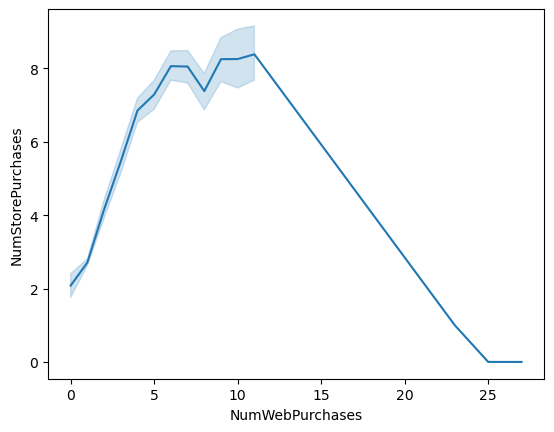

In [38]:
print("NumWebPurchases and NumStorePurchases")
sns.lineplot(data=df, x="NumWebPurchases", y="NumStorePurchases", palette=sns.color_palette("pastel"))

NumWebPurchases and Age


C:\Users\423\AppData\Local\Temp\ipykernel_2212\2669766179.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x="NumWebPurchases", y="age", palette=sns.color_palette("pastel"))
C:\Users\423\miniconda3\envs\myenvironment\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\423\miniconda3\envs\myenvironment\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='NumWebPurchases', ylabel='age'>

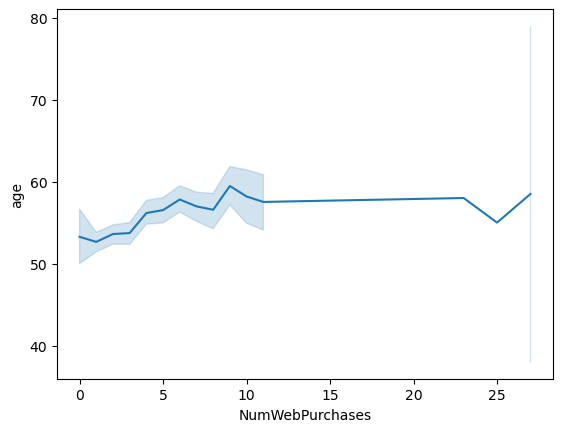

In [39]:
print("NumWebPurchases and Age")
sns.lineplot(data=df, x="NumWebPurchases", y="age", palette=sns.color_palette("pastel"))

NumStorePurchases and Age


C:\Users\423\AppData\Local\Temp\ipykernel_2212\1935171993.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x="NumStorePurchases", y="age", palette=sns.color_palette("pastel"))
C:\Users\423\miniconda3\envs\myenvironment\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\423\miniconda3\envs\myenvironment\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='NumStorePurchases', ylabel='age'>

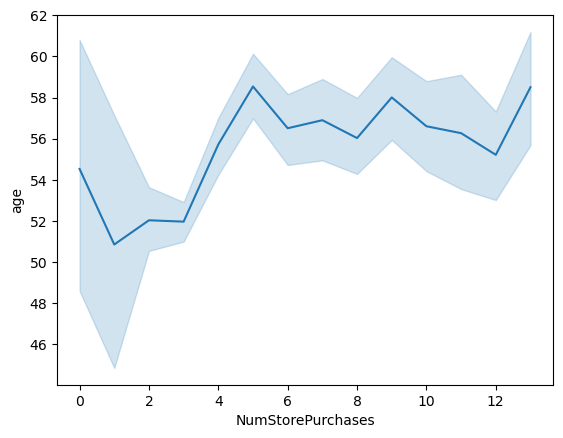

In [40]:
print("NumStorePurchases and Age")
sns.lineplot(data=df, x="NumStorePurchases", y="age", palette=sns.color_palette("pastel"))

### Выводы
- Чем выше уровень образования, тем в среднем выше доход 
- Чем выше уровень образования человека, тем больше он совершает покупок
- Более выскоий уровень образования получают люди постарше
- У людей с семейным положением "Absurd" в среднем доход выше
- У одиноких больше всего детей
- Чем меньше детей у человека, тем больше он совершает покупок

## Hard

Было отмечено, что число покупок положительно зависит от дохода и отрицательно от числа детей. Значит наша целевая аудитория - бездетные люди с высоким доходом. Высоким доходом назовём, например, тот, который хотя бы в 1.5 раза превышает средний.

In [41]:
df.loc[(df["Kidhome"] == 0) & (1.5 * df["Income"].mean() <= df["Income"])]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age
ID,,,,,,,,,,,,,,,,,,,,,
2114,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,22,...,0,0,1,1,0,0,3,11,1,78
1966,1965,PhD,Married,84618.0,0,0,2013-11-22,96,684,100,...,0,0,1,0,0,0,3,11,0,59
8601,1980,Graduation,Married,80011.0,0,1,2013-04-29,3,421,76,...,0,0,0,0,0,0,3,11,0,44
1371,1976,Graduation,Single,79941.0,0,0,2014-06-28,72,123,164,...,0,0,0,0,0,0,3,11,0,48
4114,1964,Master,Married,79143.0,0,0,2012-08-11,2,650,37,...,0,0,0,0,0,0,3,11,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4418,1983,Master,Single,89616.0,0,0,2013-02-25,36,671,47,...,0,0,0,0,0,0,3,11,1,41
8722,1957,2n Cycle,Married,82347.0,0,0,2012-11-06,38,556,54,...,1,0,0,1,0,0,3,11,1,67
10469,1981,Graduation,Together,88325.0,0,0,2014-02-05,42,519,71,...,0,0,0,0,0,0,3,11,0,43
